__Group Member Names:__ Zach Barrett, Ashton Hansen


---

# Homework 3
__Guidelines:__ 
* Please write the names of all group members to the __"Group Member Names:"__ line above. 
* This assignment comes with a data file that is required to complete it. Download this data file (__HW3_Data.xlsx__) together with this assignment.
* For the questions that require verbal answers, please answer them in their respective answer cells. 
* For the questions that require code, if your code doesn't work, please include a comment describing your algorithm (if code works well, no explanation is needed). 
* This homework is due on __Mar. 24, 2021, 5:30 pm.__ You need to upload your completed homework assignment to Sakai as a Jupyter Notebook file (.ipynb) until that time.
---

In [1]:
import numpy as np   # Run this cell to import these packages before writing your code, as they will be needed.
import pandas as pd
import datetime as dt                            # Date formats
import pandas as pd
import datetime as dt
import pandas_datareader.data as web             # Downloading data from web
import matplotlib as mpl                         # Plots
import matplotlib.pyplot as plt

---

## Question 1

Construct a dataframe as follows.

* Column 1: 20 random integers between 1 and 20, inclusive.
* Column 2: All 20 numbers from 1 to 20. (1,2,3,...,20)
* Column 3: Difference of Column 1 - Column 2.

Finally, calculate the mean and standard deviation of column 3.

In [2]:
df = pd.DataFrame()

df['1'] = [np.random.randint(1, 21) for i in range(20)]  # rand values
df['2'] = [i+1 for i in range(20)]  # 1-20

df['3'] = df['1'] - df['2'] # calculating differences

# calculating statistics
print('Mean of col 3: ', np.mean(df['3']))
print('Std. Deviation of col 3: ', np.std(df['3']))

Mean of col 3:  -0.3
Std. Deviation of col 3:  8.391066678319271


---

## Question 2
Consider the following data, provided for several investments. 

Data 1 (inv_info): For each investment following information is provided: Its investment ID, its current present value (__pv__), its yearly rate of return (__r__), and investment term in years (__t__).

Data 2 (inv_target): In a separate data frame, you also have access the target level of each investment.

Write a program that merges these two data, and then uses the function you have constructed in Homework 2 to calculate the __future values__ of investments. (Feel free the define future value function here too; if you have concerns about how to define it, please check the HW2-Q1 solution.)

The program will compare the future value with target level. Finally, your program should introduce another new column to data that indicates whether the investment will reach its target in future. The column will be either __'Yes'__ or __'No'__ depending on if the future value of the investment reaches or exceeds the target level. (You may want to use np.where() method to construct this column.)

In [3]:
# This cell constructs the data for you, you may simply run this and work on these data in the next cell.
inv_info = pd.DataFrame({
        'pv' : [100000, 200000, 150000, 400000], 
        'r' : [0.10, 0.07, 0.15, 0.01], 
        't' : [10, 5, 12, 20],
        'Investment ID' : ['Inv1', 'Inv2', 'Inv3', 'Inv4']})

inv_target = pd.DataFrame({
        'Target' : [200000, 300000, 800000, 500000],
        'Investment ID' : ['Inv1', 'Inv2', 'Inv3', 'Inv4']})

print(inv_info) 
print(inv_target)

       pv     r   t Investment ID
0  100000  0.10  10          Inv1
1  200000  0.07   5          Inv2
2  150000  0.15  12          Inv3
3  400000  0.01  20          Inv4
   Target Investment ID
0  200000          Inv1
1  300000          Inv2
2  800000          Inv3
3  500000          Inv4


In [4]:
# helper func for below method
def future_val_helper(pv, r, t):
    val = round(pv * (1 + r)**t, 2)
    return val

# func as defined by problem
def future_val_from_dfs(df1, df2):
    # merging dfs
    full_df = df1.merge(df2)
    
    # calculating future value using helper method
    full_df['fv'] = future_val_helper(full_df['pv'], full_df['r'], full_df['t'])
    
    # adding col based on if the target will be hit in the term
    full_df['Will hit target?'] = full_df['fv'] > full_df['Target']
    
    return full_df

In [5]:
# applying func
future_val_from_dfs(inv_info, inv_target)

,pv,r,t,Investment ID,Target,fv,Will hit target?
0,100000,0.10,10,Inv1,200000,259374.25,True
1,200000,0.07,5,Inv2,300000,280510.35,False
2,150000,0.15,12,Inv3,800000,802537.52,True
3,400000,0.01,20,Inv4,500000,488076.02,False


---

## Question 3
Write a program that calculates the internet bill, from a given list of customers. You will be using the __HW3_Data.xlsx__ datafile that is provided with this homework to calculate the bills.
* The program will first import the usage and fee information. (GB used and GB rate) (Sheet1)
* Second, the program will merge the "Years as customer" information of each household with the usage data. (Sheet2)

You should then write a function that uses the following parameters to calculate bill: (gb_used, gb_rate, years_as_customer). You may want to check the exercise in lecture 2 as guidance, but you'll need to rewrite this function using 'np.where' instead of 'if' conditions:
* If the internet usage is greater than 80 GB in a given month, the customer will pay 200% extra for the extra hours. (i.e., x3)
* Furthermore, if the household has been a customer for more than 10 years, the total bill will be further reduced by 10% (i.e., x0.9).

Finally, the program will construct a new "Bill" column, by inputting the necessary information as arguments into internet_bill function to produce the output as a new column in the dataframe.

<div class="alert alert-block alert-info">
<b>Hint:</b> You'll find that 'if' condition will produce ambiguity error when constructing columns in pandas (this is because the core 'if' function does not recognize the series for expression checks, without explicitly telling it which specific element of the series to look at). For this reason, you can use NumPy's 'where' function to calculate the bill. For example: 

* _Instead of:_ if gb_used > 80: bill = formula1 else: bill = formula2 || _You'll need to write:_ np.where(gb_used > 80, formula1, formula2). You'll need to repeat this twice since original function had two if statements, one for extra usage (i.e., charge extra) and one for customer years (i.e., discount). 
</div>

In [6]:
# loading data
excel_data = pd.read_excel('HW3_Data.xlsx', sheet_name=[0,1])

In [8]:
# helper method -- does the actual calculation
def internet_bill(gb_used, gb_rate, years_as_customer):
    bill = gb_used * gb_rate  # standard case
    bill = np.where(gb_used > 80, bill * 3, bill) # where over 80 gbs is used
    bill = np.where(years_as_customer > 10, bill  * .9, bill) # where customer age is over 10
    return bill

def internet_bill_calculator(path='HW3_Data.xlsx', sheet_names=[0,1]):
    # loading data
    excel_data = pd.read_excel(path, sheet_name=sheet_names)
    
    # unwrapping and merging data
    df1 = excel_data[0]
    df2 = excel_data[1]
    
    # merging data
    full_df = df1.merge(df2)
    
    full_df['Bill'] = internet_bill(full_df['GB used'], full_df['GB rate'], full_df['Years as customer'])
    
    return full_df

In [9]:
# applying method
internet_bill_calculator()

,Customer ID,GB used,GB rate,Years as customer,Bill
0,1,150,1,3,450.0
1,2,85,1,2,255.0
2,3,25,1,5,25.0
3,4,76,1,6,76.0
4,5,80,1,15,72.0
5,6,40,1,20,36.0
6,7,100,1,12,270.0
7,8,20,1,5,20.0
8,9,10,1,8,10.0
9,10,90,1,14,243.0


---

## Question 4

Download stock prices information of the following ticker: 'NFLX', between the dates from 2021-1-1 to 2021-2-1.

In a figure, plot together the 'Adj Close' prices of this stock as well as the 'Volume' of trades for this stock according to following rules:
* Prepare your figure so that these two variables each have a subplot of their own for ease of readability. Note that we want two subplots together in one figure, not two separate figures.
* Make sure that your figure size is reasonably large (e.g., a figure size of (10, 6) or more) so that the graph is easy to read. 
* Price subplot will be a line graph, and the Volume subplot will be a bar graph.

In [10]:
start = dt.datetime(2021, 1, 1)
end = dt.datetime(2021, 2, 1)

df_nflx = pd.DataFrame(web.DataReader('NFLX', 'yahoo', start, end))

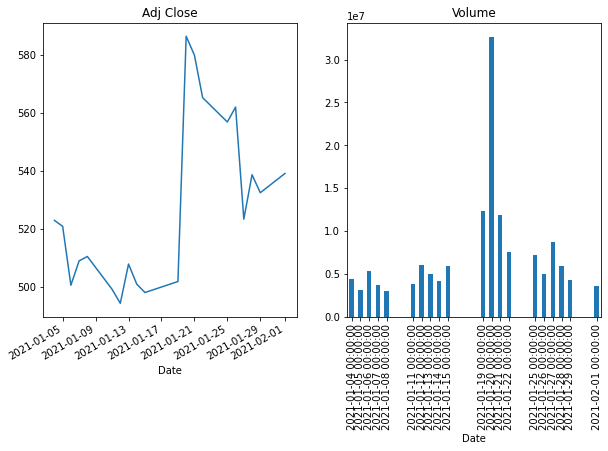

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
df_nflx['Adj Close'].plot(ax=axes[0])
df_nflx['Volume'].plot(ax=axes[1], kind='bar')

axes[0].set_title('Adj Close')
axes[1].set_title('Volume')

plt.show()

---

## Question 5

Download stock price ('Adj Close') information of the following tickers: 'CVX', 'FDX' between the dates from 2020-1-1 to 2021-1-1.

* Firstly, merge these two stock prices into one dataframe.
* Secondly, calculate the daily percentage changes in stock prices.
* Finally, scatterplot the daily percentages changes in stock prices of these two tickers. 'CVX' should be on the x-axis and 'FDX' should be on the y-axis.

In [12]:
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2021, 1, 1)

df_CVX = pd.DataFrame(web.DataReader('CVX', 'yahoo', start, end)['Adj Close'])
df_FDX = pd.DataFrame(web.DataReader('FDX', 'yahoo', start, end)['Adj Close'])

# merging dfs
full_df = df_CVX.merge(df_FDX, left_index=True, right_index=True)

# calculating percent changes
full_df['Pct change x'] = full_df['Adj Close_x'].pct_change()
full_df['Pct change y'] = full_df['Adj Close_y'].pct_change()

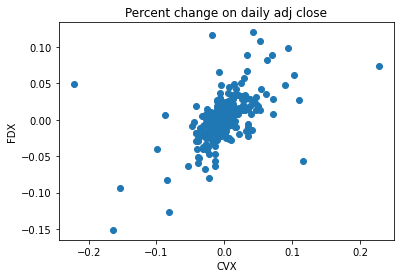

In [13]:
plt.scatter(full_df['Pct change x'], full_df['Pct change y'])
plt.xlabel('CVX')
plt.ylabel('FDX')
plt.title('Percent change on daily adj close')
plt.show()